In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib notebook
#import matplotlib.pylab as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

3


In [2]:
# Set up console so we can reattach via terminal ipython later. See:
# https://stackoverflow.com/questions/19479645/using-ipython-console-along-side-ipython-notebook

%qtconsole

# Then do `ipython console --existing` in a terminal to connect and have access to same data!
# But note, do not do CTRL-D in that terminal or it will kill the kernel!

## After adding these to `diffimTests.psf.makePsf` and `diffimTests.makeFakeImages`...

{'ZOGY': {'FP': 5, 'FN': 18, 'TP': 32}, 'ALstack': {'FP': 5, 'FN': 19, 'TP': 31}, 'SZOGY': {'FP': 4, 'FN': 16, 'TP': 34}, 'ALstack_decorr': {'FP': 4, 'FN': 20, 'TP': 30}}
A&L(dec): (0.57599938, 17.430138, -58.950779, 73.837692)
ZOGY: (0.0034672210707381718, 1.0004192227843591, -5.1721983566649889, 6.2279621734082324)
A&L(dec) - ZOGY: (0.0097250625901665107, 0.029089585517490378, -0.29423439126668383, 0.45930702641652199)


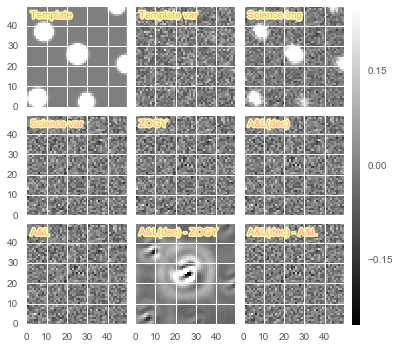

In [3]:
reload(dit)
testObj = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15.)

res = testObj.runTest(returnSources=True)
src = res['sources']
del res['sources']
print res

tmp = dit.catalogToDF(testObj.getCentroidsCatalog(transientsOnly=False))
#dit.sizeme(tmp.tail())
testObj.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 5, 'FN': 18, 'TP': 32}, 'ALstack': {'FP': 5, 'FN': 19, 'TP': 31}, 'SZOGY': {'FP': 4, 'FN': 16, 'TP': 34}, 'ALstack_decorr': {'FP': 4, 'FN': 20, 'TP': 30}}


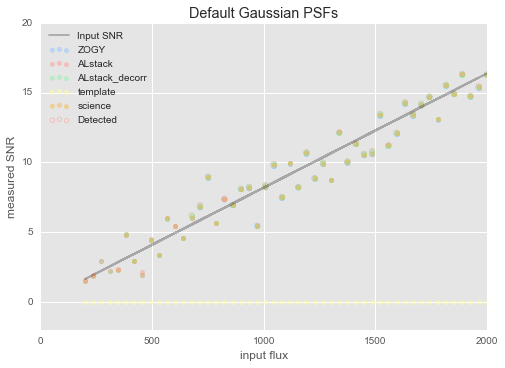

In [4]:
testObj.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Default Gaussian PSFs')

{'ZOGY': {'FP': 4, 'FN': 21, 'TP': 29}, 'ALstack': {'FP': 4, 'FN': 20, 'TP': 30}, 'SZOGY': {'FP': 6, 'FN': 23, 'TP': 27}, 'ALstack_decorr': {'FP': 4, 'FN': 21, 'TP': 29}}
A&L(dec): (0.57488525, 17.350258, -56.41864, 62.672783)
ZOGY: (0.0047894934517027825, 1.000257495869513, -4.8338885847180038, 5.4223819426827511)
A&L(dec) - ZOGY: (0.016028982575719629, 0.029780903233956765, -0.16839727184949327, 0.28828944858256489)


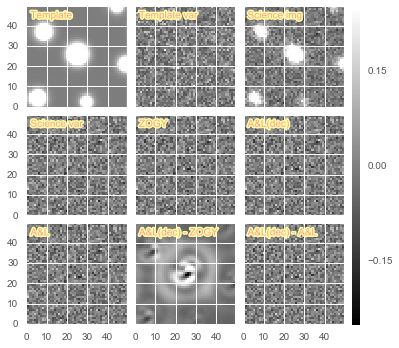

In [5]:
reload(dit)
testObj2 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType='doubleGaussian')

res2 = testObj2.runTest(returnSources=True)
src2 = res2['sources']
del res2['sources']
print res2

testObj2.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 4, 'FN': 21, 'TP': 29}, 'ALstack': {'FP': 4, 'FN': 20, 'TP': 30}, 'SZOGY': {'FP': 6, 'FN': 23, 'TP': 27}, 'ALstack_decorr': {'FP': 4, 'FN': 21, 'TP': 29}}


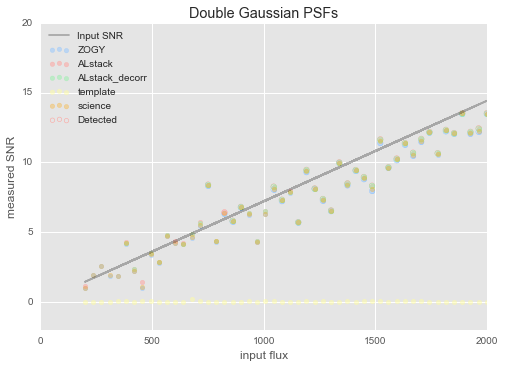

In [6]:
testObj2.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Double Gaussian PSFs')

{'ZOGY': {'FP': 6, 'FN': 22, 'TP': 28}, 'ALstack': {'FP': 6, 'FN': 23, 'TP': 27}, 'SZOGY': {'FP': 6, 'FN': 21, 'TP': 29}, 'ALstack_decorr': {'FP': 5, 'FN': 23, 'TP': 27}}
A&L(dec): (0.62457728, 17.441151, -55.747684, 62.185566)
ZOGY: (0.0035812899155972435, 0.99852779325650987, -4.9325146260462471, 5.4451720946441435)
A&L(dec) - ZOGY: (0.0096513446540805129, 0.031703123393911778, -0.27280410856604942, 0.37696648046404646)


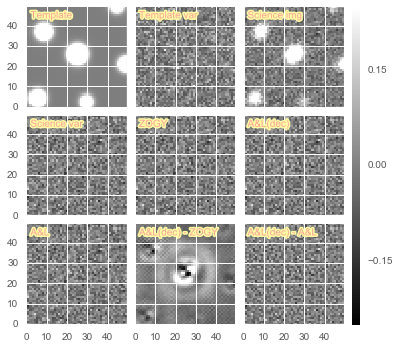

In [7]:
reload(dit)
testObj3 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType='moffat')

res3 = testObj3.runTest(returnSources=True)
src3 = res3['sources']
del res3['sources']
print res3

testObj3.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 6, 'FN': 22, 'TP': 28}, 'ALstack': {'FP': 6, 'FN': 23, 'TP': 27}, 'SZOGY': {'FP': 6, 'FN': 21, 'TP': 29}, 'ALstack_decorr': {'FP': 5, 'FN': 23, 'TP': 27}}


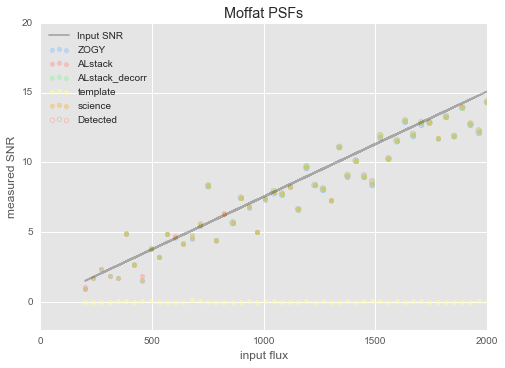

In [8]:
testObj3.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Moffat PSFs')

Kolmogorov works now, but is slow and there's still an issue with the A&L(dec) - ZOGY image.
Seems to be because of a 0.5-pixel offset in the psf. (UPDATE: Fixed!) (UPDATE2: using `@memoize` it is now much faster!

In [2]:
reload(dit)
testObj4 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType='kolmogorov', psfSize=65)

res4 = testObj4.runTest(returnSources=True)
src4 = res4['sources']
del res4['sources']
print res4

{'ZOGY': {'FP': 4, 'FN': 18, 'TP': 32}, 'ALstack': {'FP': 3, 'FN': 17, 'TP': 33}, 'SZOGY': {'FP': 4, 'FN': 17, 'TP': 33}, 'ALstack_decorr': {'FP': 2, 'FN': 17, 'TP': 33}}


A&L(dec): (1.3218734, 17.489098, -65.787888, 65.598869)
ZOGY: (0.010132625268783946, 0.93791133147369365, -4.5602008922648309, 6.0699582745378962)
A&L(dec) - ZOGY: (-0.028112118724242845, 0.37233331835768407, -1.3318821740018176, 1.1545303306562884)


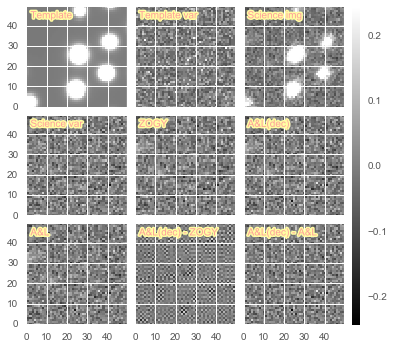

In [5]:
tmp = dit.catalogToDF(testObj4.getCentroidsCatalog(transientsOnly=False))
testObj4.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);
#testObj4.doPlot();

This difference (below) is due to an issue probably with an offset in the PSFs. (NOTE: the offset is fixed, but there is still a small decrease in SNR for high-SNR sources. Likely due to the large "halo"?

{'ZOGY': {'FP': 4, 'FN': 18, 'TP': 32}, 'ALstack': {'FP': 3, 'FN': 17, 'TP': 33}, 'SZOGY': {'FP': 4, 'FN': 17, 'TP': 33}, 'ALstack_decorr': {'FP': 2, 'FN': 17, 'TP': 33}}


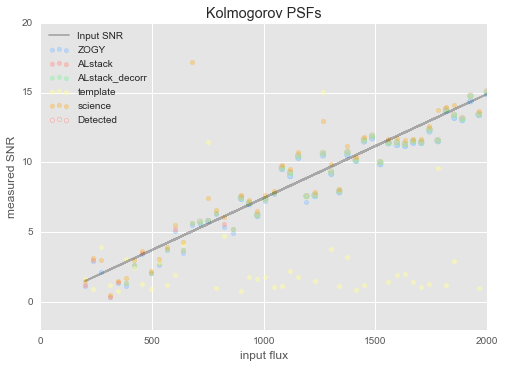

In [6]:
testObj4.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Kolmogorov PSFs')

# Now for "real" psfs from real images.

Ran this cell once, don't run it again. Results are cached in `psfLib` directory.

In [40]:
import diffimTests as dit
import glob, os

afwData = os.getenv('AFWDATA_DIR')
drpData = os.getenv('HOME') + '/DATA/'

#fnames = glob.glob('./psfLib/*.fits')
#fnames = [fn.replace('_psf', '') for fn in fnames]
filenames = glob.glob(afwData + '/CFHT/D4/*.fits')
# PsfEx doesn't seem to work well on the imsim simulated images.
filenames.extend(glob.glob(afwData + '/ImSim/postISR/v85751839-fr/s1/R23/S11/*.fits'))
filenames.extend(glob.glob(drpData + '/validation_data_decam/data/*/calexp/calexp*.fits'))
filenames.extend(glob.glob(drpData + './validation_data_cfht/data/calexp/06AL01/D3/2006-*/r/calexp*.fits'))
filenames.sort()

psfs = {}
for filename in filenames:
    #print filename
    try:
        psf, source = dit.psf.loadPsf(filename, asArray=False)
        if psf is not None:
            printedFilename = filename.replace(afwData, '')
            printedFilename = printedFilename.replace(drpData, '')
            print printedFilename, dit.afw.afwPsfToShape(psf)
            psfs[filename] = psf
    except Exception as e:
        pass
        #print e
        
print len(psfs)

./validation_data_cfht/data/calexp/06AL01/D3/2006-05-20/r/calexp-849375-12.fits (ixx=5.9499096786, iyy=6.18960813367, ixy=0.231962318226)
./validation_data_cfht/data/calexp/06AL01/D3/2006-05-20/r/calexp-849375-13.fits (ixx=6.00295163447, iyy=6.30849343732, ixy=0.166765062081)
./validation_data_cfht/data/calexp/06AL01/D3/2006-05-20/r/calexp-849375-14.fits (ixx=6.00507708972, iyy=6.22403927679, ixy=0.123370545201)
./validation_data_cfht/data/calexp/06AL01/D3/2006-05-20/r/calexp-849375-21.fits (ixx=5.74661871627, iyy=6.21675826397, ixy=0.121065024952)
./validation_data_cfht/data/calexp/06AL01/D3/2006-05-20/r/calexp-849375-22.fits (ixx=5.88440971107, iyy=6.38369718929, ixy=0.391448320054)
./validation_data_cfht/data/calexp/06AL01/D3/2006-05-20/r/calexp-849375-23.fits (ixx=6.82290123674, iyy=6.85868733076, ixy=0.0165813171521)
./validation_data_cfht/data/calexp/06AL01/D3/2006-06-02/r/calexp-850587-12.fits (ixx=2.70521352256, iyy=3.03692456155, ixy=0.234672293489)
./validation_data_cfht/data

58


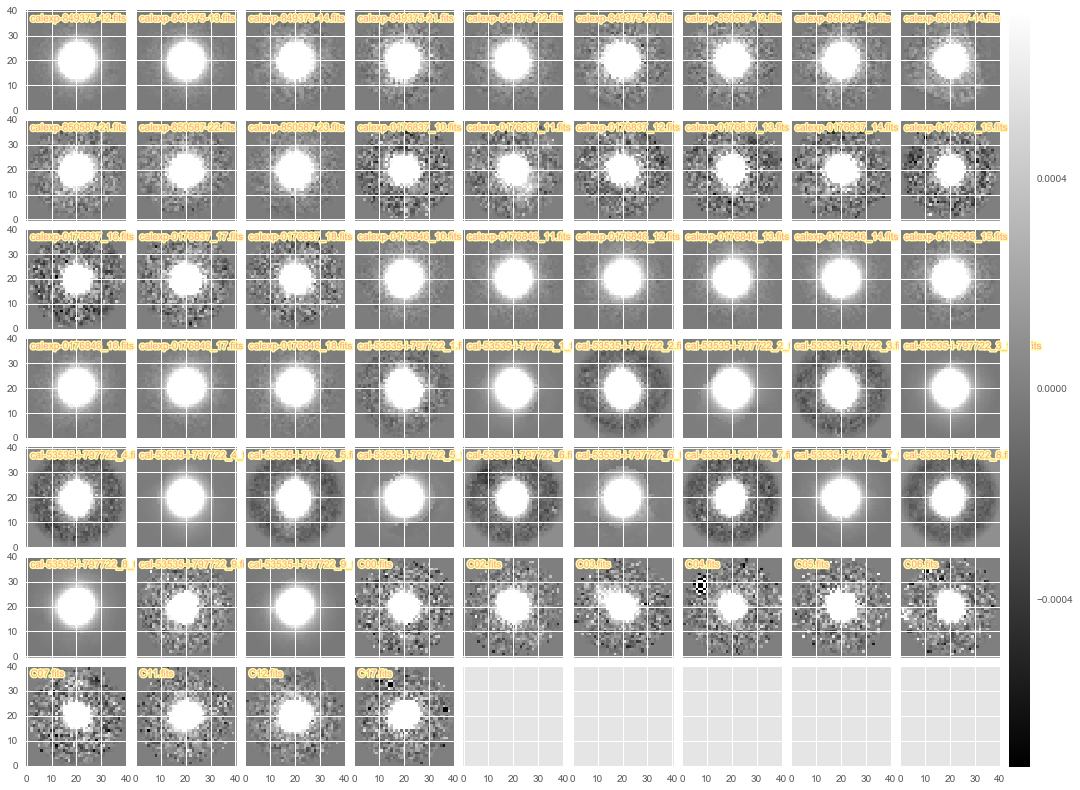

In [18]:
psftmp = [dit.afw.afwPsfToArray(psfs[key]) for key in sorted(psfs.keys())]
psftitles = [os.path.basename(key) for key in sorted(psfs.keys())]
psftitles = [t for i,t in enumerate(psftitles) if psftmp[i] is not None]
psftmp = [p for p in psftmp if p is not None]
print len(psftmp)
#print psftitles
dit.plotImageGrid(psftmp, titles=psftitles)

## OK now let's figure out how to make the fake image generator use the real PSFS.

Still needs work, I think there's a 1-pixel offset.

Also, need to be able to pass different PSFs for template and science (DONE!)

Question - how and whether to use spatial variation.

<class 'lsst.afw.detection.detectionLib.Psf'>
True
<type 'numpy.ndarray'>
True
(ixx=3.27248563399, iyy=3.55102064854, ixy=0.0804140879974) 3.41175314126
(ixx=2.16446894133, iyy=3.13680298165, ixy=-0.0105360601912) 2.65063596149
(-0.085904253625282326, -0.0066697330878426452)
(-0.25481559029375839, -0.087207932863786558)
(-0.085904253625282326, -0.0066697330878426452)
(0.36091519470050115, -0.0066692005103534055)
(-0.085905009500162957, 0.44020078136351259)


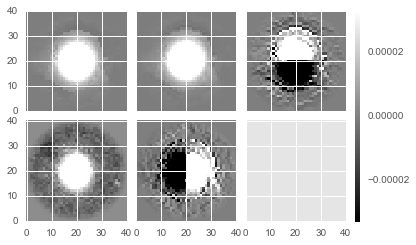

In [41]:
afwData = os.getenv('AFWDATA_DIR')
filename = afwData + '/CFHT/D4/cal-53535-i-797722_6_tmpl.fits'
psf, source = dit.psf.loadPsf(filename, asArray=False)
print type(psf)
from lsst.afw.detection import Psf
print isinstance(psf, Psf)
psfImg = dit.afw.afwPsfToArray(psf)
psfImg2 = dit.afw.afwPsfToArray(psf, centroid=[0.0, 0.45])
psfImg3 = dit.afw.afwPsfToArray(psf, centroid=[0.45, 0.0])
print type(psfImg)
print isinstance(psfImg, np.ndarray)

filename2 = afwData + '/CFHT/D4/cal-53535-i-797722_6.fits'
psf2, source = dit.psf.loadPsf(filename2, asArray=False)
psf2Img = dit.afw.afwPsfToArray(psf2)

#psfImg2 = dit.afw.afwPsfToArray(psf2, centroid=[0.0, 0.45])
#psfImg3 = dit.afw.afwPsfToArray(psf2, centroid=[0.45, 0.0])

sh = dit.afw.afwPsfToShape(psf)
print sh, (sh.getIxx() + sh.getIyy()) / 2.
sh = dit.afw.afwPsfToShape(psf2)
print sh, (sh.getIxx() + sh.getIyy()) / 2.

print dit.psf.computeMoments(dit.afw.afwPsfToArray(psf))
print dit.psf.computeMoments(dit.afw.afwPsfToArray(psf2))

print dit.psf.computeMoments(psfImg)
print dit.psf.computeMoments(psfImg2)
print dit.psf.computeMoments(psfImg3)

dit.plotImageGrid((psfImg, psfImg2, psfImg2-psfImg, psf2Img, psfImg3-psfImg))

In [5]:
tmp = dit.psf.makePsf(psfType=psf)
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType=psf, offset=[0.5, 0.5])
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='gaussian')
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='gaussian', offset=[0.5, 0.5])
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='kolmogorov')
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='kolmogorov', offset=[0.5, 0.5])
print dit.psf.computeMoments(tmp)

(-7.6432171375012681e-05, 0.00025132158433827101)
(0.45841940350331423, 0.45868135296995982)
(-2.7755575615628914e-17, 5.5511151231257827e-17)
(0.49999999999999994, 0.49999999999999989)
(0.0, 0.0)
(0.49950073308496762, 0.49950073308496762)


In [42]:
filename = afwData + '/CFHT/D4/cal-53535-i-797722_6_tmpl.fits'
psf, source = dit.psf.loadPsf(filename, asArray=False)
psf = dit.psf.recenterPsf(dit.afw.afwPsfToArray(psf))
filename2 = afwData + '/CFHT/D4/cal-53535-i-797722_6.fits'
psf2, source = dit.psf.loadPsf(filename2, asArray=False)
psf2 = dit.psf.recenterPsf(dit.afw.afwPsfToArray(psf2))
print dit.afw.arrayToAfwPsf(psf).computeShape(), '\n', dit.psf.computeMoments(psf)
print dit.afw.arrayToAfwPsf(psf2).computeShape(), '\n', dit.psf.computeMoments(psf2)

(ixx=3.44788566275, iyy=3.88997902929, ixy=0.144224771904) 
(-8.0738486505497331e-05, 0.00026548145866597654)
(ixx=2.122365971, iyy=3.66354216737, ixy=-0.0555589989432) 
(-0.00014086834426292917, -0.00090423562875910129)


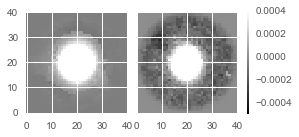

In [37]:
dit.plotImageGrid((psf, psf2), same_zscale=True)

`psf` is narrower than `psf2`, so let's just use it for the template here...

{'ZOGY': {'FP': 7, 'FN': 20, 'TP': 30}, 'ALstack': {'FP': 4, 'FN': 19, 'TP': 31}, 'SZOGY': {'FP': 4, 'FN': 20, 'TP': 30}, 'ALstack_decorr': {'FP': 3, 'FN': 18, 'TP': 32}}
A&L(dec): (2.2121053, 17.524517, -78.805496, 83.639847)
ZOGY: (0.0065236043141283801, 0.99011122523437556, -5.3016421258664943, 6.271573472898635)
A&L(dec) - ZOGY: (-0.00135563051602685, 1.4882766281677704, -6.2093892126087402, 5.689473938284765)


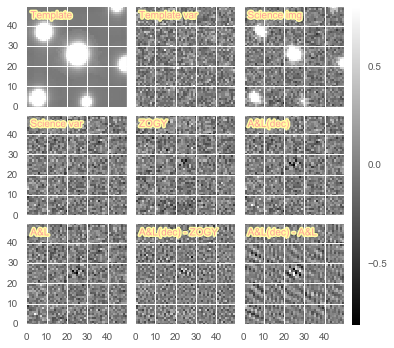

In [38]:
reload(dit)
testObj5 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50), #offset=[0.05, 0.],
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType=[psf, psf2], 
                         psf1=1., psf2=1., theta1=0.) # to prevent tweaking the PSFs

res5 = testObj5.runTest(returnSources=True)
src5 = res5['sources']
del res5['sources']
print res5

tmp = dit.catalogToDF(testObj5.getCentroidsCatalog(transientsOnly=False))

testObj5.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]], 
                same_zscale=True);

{'ZOGY': {'FP': 7, 'FN': 20, 'TP': 30}, 'ALstack': {'FP': 4, 'FN': 19, 'TP': 31}, 'SZOGY': {'FP': 4, 'FN': 20, 'TP': 30}, 'ALstack_decorr': {'FP': 3, 'FN': 18, 'TP': 32}}


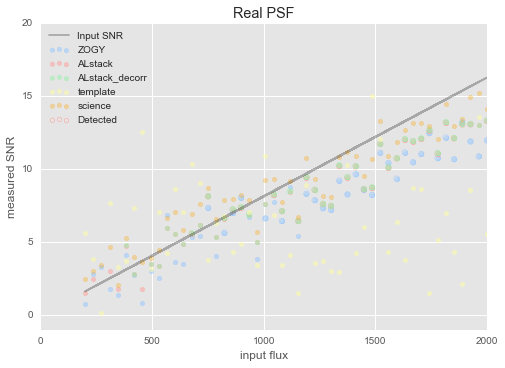

In [39]:
tmp5 = testObj5.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-1., 20)
plt.title('Real PSF');

Why are the SNRs for template so high? 

When they were below zero, it was related to the noise in the template PSF. If I don't use the "_tmpl" version of the PSF, then it gets even worse.

Compute offset between input catalog and measured centroids in template image.

In [5]:
column='base_GaussianCentroid'
fluxCol='base_PsfFlux'

src1 = testObj5.im1.doDetection(asDF=True)
src1 = src1[~src1[column + '_flag'] & ~src1[fluxCol + '_flag']]
src1 = src1[[column + '_x', column + '_y', fluxCol + '_flux']]
src1.reindex()

# src2 = self.im2.doDetection(asDF=True)
# src2 = src2[~src2[column + '_flag'] & ~src2[fluxCol + '_flag']]
# src2 = src2[[column + '_x', column + '_y', fluxCol + '_flux']]
# src2.reindex()

src2 = tmp[['centroid_x', 'centroid_y', 'inputFlux_science']]

In [6]:
dx, dy, _ = dit.catalog.computeOffsets(src1, src2, threshold=2.5)
dx, dy

(0.00012116141862916054, 0.0063880710563617698)

Can use filenames for "real" PSFs now:

{'ZOGY': {'FP': 6, 'FN': 21, 'TP': 29}, 'ALstack': {'FP': 4, 'FN': 21, 'TP': 29}, 'SZOGY': {'FP': 8, 'FN': 20, 'TP': 30}, 'ALstack_decorr': {'FP': 4, 'FN': 21, 'TP': 29}}
A&L(dec): (2.0286763, 17.318796, -80.474998, 94.479927)
ZOGY: (0.0055231207077064805, 0.98913435256494298, -4.8885114812038406, 5.6369203936411632)
A&L(dec) - ZOGY: (0.014736751471519509, 1.4918178165126983, -6.0397244001745118, 6.9784220268411623)


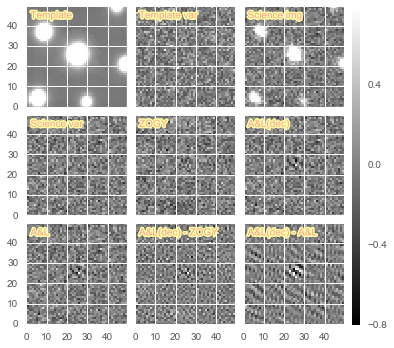

In [43]:
filename = afwData + '/CFHT/D4/cal-53535-i-797722_6_tmpl.fits'
#psf, source = dit.psf.loadPsf(filename, asArray=False)
filename2 = afwData + '/CFHT/D4/cal-53535-i-797722_6.fits'
#psf2, source = dit.psf.loadPsf(filename2, asArray=False)

reload(dit)
testObj5a = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50), #offset=[0.05, 0.],
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType=[filename, filename2],
                         psf1=1., psf2=1., theta1=0.) # to prevent tweaking the PSFs

res5 = testObj5a.runTest(returnSources=True)
src5 = res5['sources']
del res5['sources']
print res5

tmp = dit.catalogToDF(testObj5a.getCentroidsCatalog(transientsOnly=False))

testObj5a.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]], 
                same_zscale=True);

{'ZOGY': {'FP': 7, 'FN': 20, 'TP': 30}, 'ALstack': {'FP': 4, 'FN': 19, 'TP': 31}, 'SZOGY': {'FP': 4, 'FN': 20, 'TP': 30}, 'ALstack_decorr': {'FP': 3, 'FN': 18, 'TP': 32}}


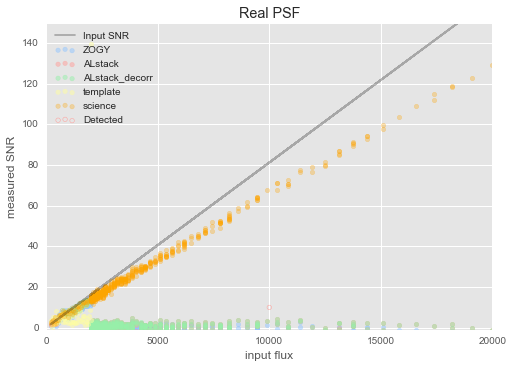

In [45]:
tmp5 = testObj5a.doPlotWithDetectionsHighlighted(transientsOnly=False, divideByInput=False, addPresub=True)
plt.xlim(0, 20000)
plt.ylim(-1., 150)
plt.title('Real PSF');

In [17]:
%timeit dit.psf.loadPsf(filename, asArray=False)  # without memoize

1000 loops, best of 3: 948 µs per loop


In [3]:
%timeit dit.psf.loadPsf(filename, asArray=False)  # with it.

100000 loops, best of 3: 2.52 µs per loop


In [ ]:
testObj